In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
def transition_probability(curr_state, next_state, action):
    action_value = [-1, -10, 1, 10] # curr_state - next_state (based on state space)
    col = int(curr_state/10)
    row = int(curr_state%10)
    unallowed = [] # unallowed directions for a given state
    if row==0:
        unallowed.append(0) # top
    elif row==9:
        unallowed.append(2) # bottom
    if col==0:
        unallowed.append(1) # left
    elif col==9:
        unallowed.append(3) # right
    
    value = action_value[action]
    neighborhood = []
    for index in np.arange(0,4): # building neighborhood of the current state
        if index not in unallowed:
            neighborhood.append(curr_state + action_value[index])
    if unallowed: # not empty => edges or corners
        if len(unallowed)==2: # corners
            if action in unallowed: # action to move off the grid
                if next_state==curr_state: # => same_state
                    return 1-w+w/4+w/4
                elif next_state in neighborhood: # neighboring valid states
                    return w/4
            else: # action to stay in the grid
                if next_state==curr_state: # => same_state
                    return w/4+w/4
                elif next_state==curr_state+value and next_state in neighborhood: # intended state
                    return 1-w+w/4
                elif next_state in neighborhood: # neighboring valid states
                    return w/4      
        else: # edges
            if action in unallowed: # action to move off the grid
                if next_state==curr_state: # => same_state
                    return 1-w+w/4
                elif next_state in neighborhood: # neighboring valid states
                    return w/4
            else: # action to stay in the grid
                if next_state==curr_state: # => same_state
                    return w/4
                elif next_state==curr_state+value and next_state in neighborhood: # intended state
                    return 1-w+w/4
                elif next_state in neighborhood: # neighboring valid states
                    return w/4
            
    else: # non boundary
        if next_state==curr_state + value and next_state in neighborhood:
            return 1-w+w/4
        elif next_state in neighborhood:
            return w/4
    return 0

def construct_neighborhood(curr_state):
    col = int(curr_state/10)
    row = int(curr_state%10)
    action_value = [-1, -10, 1, 10] # curr_state - next_state (based on state space)
    unallowed = [] # unallowed directions for a given state
    if row==0:
        unallowed.append(0) # top
    elif row==9:
        unallowed.append(2) # bottom
    if col==0:
        unallowed.append(1) # left
    elif col==9:
        unallowed.append(3) # right
    
    neighborhood = []
    for index in np.arange(0,4): # building neighborhood of the current state
        if index not in unallowed:
            neighborhood.append(curr_state + action_value[index])
    return neighborhood

def value_iteration_value(reward, state_space, action_set, discount_factor):
    epsilon = 0.01
    V = np.zeros(shape=[10,10])
    delta = float("inf")
    flatten_state = []
    for element in state_space:
        for el in element:
            flatten_state.append(el)
            
    maximum = -1*float("inf")
    while delta > epsilon:
        delta = 0 
        for curr_state in flatten_state:
            curr_col = int(curr_state/10)
            curr_row = int(curr_state%10)
            v = V[curr_row][curr_col]
            neighborhood = construct_neighborhood(curr_state)
            states_to_visit = neighborhood + [curr_state]
            maximum = -1*float("inf")
            for action in action_set:
                total = 0
                for next_state in states_to_visit:
                    p = transition_probability(curr_state, next_state, action)
                    next_col = int(next_state/10)
                    next_row = int(next_state%10)
                    total += p * (reward[next_row, next_col] + discount_factor * V[next_row][next_col])
#                     if curr_row==9 and curr_col==9:
#                         print next_state, next_row, next_col
#                         print action, next_state, p, reward[next_row, next_col], V[next_row][next_col] 
                if total>maximum:
                    maximum = total
            V[curr_row][curr_col] = maximum
#             if curr_row==9 and curr_col==9:
#                 print ("currrow, currcol, max: ", curr_row, curr_col, maximum)
#             print ("currrow, currcol, max: ", curr_row, curr_col, maximum)
            delta = max(delta, np.abs(v - V[curr_row][curr_col]))
    return V

def value_iteration_action(reward, state_space, action_set, discount_factor):
    epsilon = 0.01
    V = np.zeros(shape=[10,10])
    pi = np.zeros(shape=[10,10])
    delta = float("inf")
    flatten_state = []
    for element in state_space:
        for el in element:
            flatten_state.append(el)
    #print(flatten_state)    
    maximum = -1*float("inf")
    while delta > epsilon:
        delta = 0
        temp=np.zeros([10,10])
        for curr_state in flatten_state:
            curr_col = int(curr_state/10)
            curr_row = int(curr_state%10)
            v = V[curr_row][curr_col]
            neighborhood = construct_neighborhood(curr_state)
            states_to_visit = neighborhood + [curr_state]
            maximum = -1*float("inf")
            for action in action_set:
                total = 0
                for next_state in states_to_visit:
                    p = transition_probability(curr_state, next_state, action)
                    next_col = int(next_state/10)
                    next_row = int(next_state%10)
                    total += p * (reward[next_row, next_col] + discount_factor * V[next_row][next_col])
                if total>maximum:
                    maximum = total
            temp[curr_row][curr_col] = maximum
            delta = max(delta, np.abs(v - temp[curr_row][curr_col]))
        V=temp
    maximum = -1*float("inf")
    for curr_state in flatten_state:
        curr_col = int(curr_state/10)
        curr_row = int(curr_state%10)
        neighborhood = construct_neighborhood(curr_state)
        states_to_visit = neighborhood + [curr_state]
        maximum = -1*float("inf")
        second_max=-1*float("inf")
        max_index=0
        for action in [0,1,3,2]: # or action set
            total = 0
            for next_state in states_to_visit:
                p = transition_probability(curr_state, next_state, action)
                next_col = int(next_state/10)
                next_row = int(next_state%10)
                total += p * ((reward[next_row, next_col]) + discount_factor * V[next_row][next_col])
            if total>maximum:
                second_max=maximum
                max_index2 = max_index
                
                maximum = total
                max_index = action
                
            elif total>second_max:
                second_maximum = total
                max_index2 = action
        pi[curr_row][curr_col] = max_index
        
#     print("once")
#     for curr_state in flatten_state:
#         curr_col = int(curr_state/10)
#         curr_row = int(curr_state%10)
#         if pi[curr_row][curr_col]==0 and ((curr_row-1)*10+curr_col in flatten_state):
#             if pi[curr_row-1][curr_col]==2:
#                 print("ud",curr_row,curr_col)
#                 pi[curr_row][curr_col]=2
#         if pi[curr_row][curr_col]==1 and ((curr_row)*10+(curr_col-1) in flatten_state):
#             if pi[curr_row][curr_col-1]==3:
#                 print("lr",curr_row,curr_col)
#                 pi[curr_row][curr_col]=3

#         if curr_row==0 and pi[curr_row][curr_col]==0:
#             pi[curr_row][curr_col]=2
#         elif curr_row==9 and pi[curr_row][curr_col]==2:
#             pi[curr_row][curr_col]=0
#         if curr_col==0 and pi[curr_row][curr_col]==1:
#             pi[curr_row][curr_col]=3
#         elif curr_row==9 and pi[curr_row][curr_col]==3:
#             pi[curr_row][curr_col]=1
            
        
    return pi

In [19]:
def value_iteration_action1(reward, state_space, action_set, discount_factor):
    epsilon = 0.01
    V = np.zeros(shape=[10,10])
    pi = np.zeros(shape=[10,10])
    delta = float("inf")
    flatten_state = []
    for element in state_space:
        for el in element:
            flatten_state.append(el)
    #print(flatten_state)    
    maximum = -1*float("inf")
    while delta > epsilon:
        delta = 0
        temp=np.zeros([10,10])
        for curr_state in flatten_state:
            curr_col = int(curr_state/10)
            curr_row = int(curr_state%10)
            v = V[curr_row][curr_col]
            neighborhood = construct_neighborhood(curr_state)
            states_to_visit = neighborhood + [curr_state]
            maximum = -1*float("inf")
            for action in action_set:
                total = 0
                for next_state in states_to_visit:
                    p = transition_probability(curr_state, next_state, action)
                    next_col = int(next_state/10)
                    next_row = int(next_state%10)
                    total += p * (reward[next_row, next_col] + discount_factor * V[next_row][next_col])
                if total>maximum:
                    maximum = total
            temp[curr_row][curr_col] = maximum
            delta = max(delta, np.abs(v - temp[curr_row][curr_col]))
        V=temp
    maximum = -1*float("inf")
    for curr_state in flatten_state:
        curr_col = int(curr_state/10)
        curr_row = int(curr_state%10)
        neighborhood = construct_neighborhood(curr_state)
        states_to_visit = neighborhood + [curr_state]
        maximum = -1*float("inf")
        second_max=-1*float("inf")
        max_index=0
        for action in [0,1,3,2]: # or action set
            total = 0
            for next_state in states_to_visit:
                p = transition_probability(curr_state, next_state, action)
                next_col = int(next_state/10)
                next_row = int(next_state%10)
                total += p * ((reward[next_row, next_col]) + discount_factor * V[next_row][next_col])
            if total>maximum:
                second_max=maximum
                max_index2 = max_index
                
                maximum = total
                max_index = action
                
            elif total>second_max:
                second_maximum = total
                max_index2 = action
        pi[curr_row][curr_col] = max_index
        
    print("once")
    
                
    for curr_state in flatten_state:
        curr_col = int(curr_state/10)
        curr_row = int(curr_state%10)
#         if pi[curr_row][curr_col]==0 and ((curr_row-1)*10+curr_col in flatten_state):
#             if pi[curr_row-1][curr_col]==2:
#                 print("ud",curr_row,curr_col)
#                 pi[curr_row][curr_col]=2
#         if pi[curr_row][curr_col]==1 and ((curr_row)*10+(curr_col-1) in flatten_state):
#             if pi[curr_row][curr_col-1]==3:
#                 print("lr",curr_row,curr_col)
#                 pi[curr_row][curr_col]=3

        if curr_row==0 and pi[curr_row][curr_col]==0:#up
            print(curr_row,curr_col, "changed 0 to 2")
            pi[curr_row][curr_col]=2
        if curr_row==9 and pi[curr_row][curr_col]==2:#down
            print(curr_row,curr_col, "changed 2 to 0")
            pi[curr_row][curr_col]=3
        if curr_col==0 and pi[curr_row][curr_col]==1:#left
            print(curr_row,curr_col, "changed 1 to 3")
            pi[curr_row][curr_col]=2
        if curr_col==9 and pi[curr_row][curr_col]==3:#right
            print(curr_row,curr_col, "changed 3 to 1")
            pi[curr_row][curr_col]=2
    
    for curr_state in flatten_state:
        curr_col = int(curr_state/10)
        curr_row = int(curr_state%10)
        if pi[curr_row][curr_col]==0 and ((curr_row-1)*10+curr_col in flatten_state):
            if pi[curr_row-1][curr_col]==2:
                print("ud",curr_row,curr_col)
                pi[curr_row][curr_col]=2
        if pi[curr_row][curr_col]==1 and ((curr_row)*10+(curr_col-1) in flatten_state):
            if pi[curr_row][curr_col-1]==3:
                print("lr",curr_row,curr_col)
                pi[curr_row][curr_col]=3
    
        
    return pi

In [20]:
num_states=100
num_actions=4
state_space = np.zeros(shape=[10,10])
state_space = [[10.0*i+j for i in range(0,10)] for j in range(0, 10)]
action_set = [0, 1, 2, 3] # top, left, bottom, right
discount_factor = 0.8
w=0.1


In [21]:
prob_matrix = np.zeros(shape=[100,100,4])
#prob_matrix=[[[transition_probability(i,j,k) for i in range(0,100)] for j in range(0, 100)] for k in range(0,4)] 
for k in range(0,4):
    for j in range(0,100):
        for i in range(0,100):
            prob_matrix[i][j][k]=transition_probability(i,j,k);


np.shape(prob_matrix)

(100, 100, 4)

In [22]:
#Q11
from cvxopt import matrix, solvers
solvers.options['show_progress'] = False
def irl(num_states, num_actions, prob_matrix, opt_policy, discount_factor, Rmax, reg):
    
    c = np.zeros(3 * num_states)
    c[num_states:2 * num_states] = -1
    c[2 * num_states:3 * num_states ] = reg
    
    h = np.zeros(2 * num_states * (num_actions - 1) + 4 * num_states)
    h[2 * num_states * (num_actions - 1) + 2 * num_states:2 * num_states * (num_actions - 1) + 4 * num_states ]=Rmax
    
    G = np.zeros([2 * num_states * (num_actions - 1) + 4 * num_states, 3 * num_states])
    
    for i in range(num_states):
        G[2 * num_states * (num_actions - 1) + 2 * num_states+i,i ]=1 #800-900
        G[2 * num_states * (num_actions - 1) + 3 * num_states+i,i ]=-1 #900-1000
        G[2 * num_states * (num_actions - 1) + i , i ]=1 #600-700, 1st col
        G[2 * num_states * (num_actions - 1) + i , 2 * num_states+i ]=-1 #600-700, 3rd col
        G[2 * num_states * (num_actions - 1) + num_states+i,i ]=-1 #700-800, 1st col
        G[2 * num_states * (num_actions - 1) +num_states+ i,2 * num_states+i ]=-1 #700-800, 3rd col
    
#     for i in range(num_states):            ##2nd column for first 300 rows
#         G[i, num_states + i] = 1
#         G[num_states+i,num_states + i]=1
#         G[2*num_states+i,num_states + i]=1
    
    for i in range(num_states):         ##first column for first 600 rows
        a_i = int(opt_policy[i%10][i//10])
        second_term = np.linalg.inv(np.identity(num_states) - discount_factor * prob_matrix[:,:,a_i])

        count = 0
        for a in range(num_actions):
            if (a != a_i):
                G[i * (num_actions - 1) + count, :num_states] = - np.dot(np.asarray(prob_matrix[i,:,a_i]) - np.asarray(prob_matrix[i,:,a]), second_term)
            
                G[num_states * (num_actions - 1) + i * (num_actions - 1) + count, :num_states] = - \
                np.dot(np.asarray(prob_matrix[i,:,a_i]) - np.asarray(prob_matrix[i,:,a]), second_term)
                
                G[i * (num_actions - 1) + count, num_states + i] = 1
                #G[num_states * (num_actions - 1) + i * (num_actions - 1) + count,num_states + i] = 1
                count += 1
            
    sol = solvers.lp(matrix(c), matrix(G), matrix(h))
    return sol

In [23]:
import matplotlib.pyplot as plt
x_plot=[]
reward_1 = np.zeros(shape=[10,10])
reward_1[9][9] = 1
actual_policy=value_iteration_action(reward_1, state_space, action_set, discount_factor)
opt_policy=actual_policy
Rmax=1

In [8]:
#Q11,Q12
max_acc=0
max_reg=0
max_reward=[]
for i in range(0,500):
    x=irl(num_states, num_actions, prob_matrix, opt_policy, discount_factor, Rmax, i/100.0)
    reward_computed=x['x'][:num_states]
    reward_computed=np.reshape(reward_computed,(10,10))
    reward_computed=np.transpose(reward_computed)
    policy_computed = value_iteration_action(reward_computed, state_space, action_set, discount_factor)
    count =0;
    for j in range(10):
        for k in range(10):
            if(policy_computed[j][k]==actual_policy[j][k]):
                count+=1;
    acc=count/100.0;
    if(acc>max_acc):
        max_acc=acc
        max_reg=i/100.0
        max_reward=reward_computed
    x_plot.append(acc);



max accuracy is:
0.68
best lambda is:
0.18


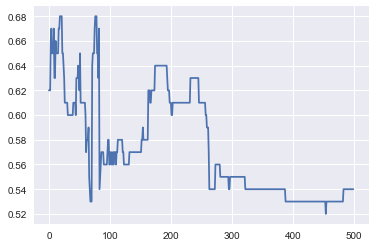

In [9]:
#Q12
print("max accuracy is:")
print(max_acc)
print("best lambda is:")
print(max_reg)
plt.plot(x_plot);
plt.show()

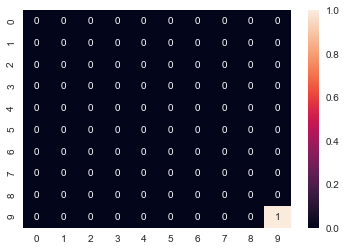

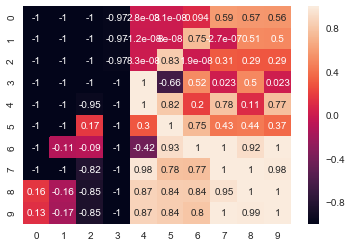

once
0 8 changed 0 to 2
8 0 changed 1 to 3
ud 8 8
ud 9 0
ud 9 8
0.69


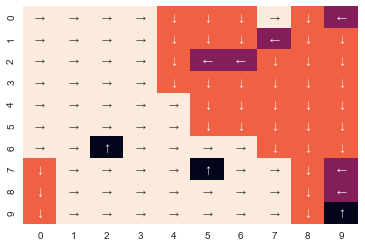

In [10]:
#Q13
Rmax=1

# x=irl(num_states, num_actions, prob_matrix, opt_policy, discount_factor, Rmax, 0.09)
# reward_computed=x['x'][:num_states]
# reward_computed=np.reshape(reward_computed,(10,10))
# reward_computed=np.transpose(reward_computed)
# print(sns.heatmap(reward_1))
# print(sns.heatmap(reward_computed))
plt.clf()
ax = sns.heatmap(reward_1, annot=True)
plt.show()

plt.clf()
ax1 = sns.heatmap(max_reward, annot=True)
plt.show()

#policy_computed = value_iteration_action1(max_reward, state_space, action_set, discount_factor)
policy_computed = value_iteration_action1(max_reward, state_space, action_set, discount_factor)

import sys
arrows = [u'\u2191', u'\u2190',u'\u2193',u'\u2192']
arrow_matrix = np.array(policy_computed, dtype=object)
# print arrows
for i in range(0, 10):
    for j in range(0, 10):
        index = int(policy_computed[i][j])
        arrow_matrix[i][j] = arrows[index]
ax = sns.heatmap(policy_computed, annot=arrow_matrix, fmt='',cbar=False)

count =0;
for i in range(10):
    for j in range(10):
        if(policy_computed[i][j]==actual_policy[i][j]):
            count+=1;
acc=count/100.0;
print(acc)


In [24]:
x_plot=[]
reward_2 = np.zeros(shape=[10,10])
reward_2[1, 4:7] = -100
reward_2[1:7, 4] = -100
reward_2[1:4, 6] = -100
reward_2[3, 6:9] = -100
reward_2[3:8, 8] = -100
reward_2[7, 6:9] = -100
reward_2[8, 6] = -100
reward_2[9,9] = 10
actual_policy=value_iteration_action(reward_2, state_space, action_set, discount_factor)
opt_policy=actual_policy
Rmax=10

In [30]:
#Q18,Q19
max_acc=0
max_reg=0
max_reward=[]
for i in range(0,500):
    x=irl(num_states, num_actions, prob_matrix, opt_policy, discount_factor, Rmax, i/100.0)
    reward_computed=x['x'][:num_states]
    reward_computed=np.reshape(reward_computed,(10,10))
    reward_computed=np.transpose(reward_computed)
    policy_computed = value_iteration_action1(reward_computed, state_space, action_set, discount_factor)
    count =0;
    for j in range(10):
        for k in range(10):
            if(policy_computed[j][k]==actual_policy[j][k]):
                count+=1;
    acc=count/100.0;
    if(acc>max_acc):
        max_acc=acc
        max_reg=i/100.0
        max_reward=reward_computed
    x_plot.append(acc);

once
9 3 changed 2 to 0
9 8 changed 2 to 0
lr 9 9
once
9 3 changed 2 to 0
9 8 changed 2 to 0
lr 9 9
once
9 3 changed 2 to 0
9 8 changed 2 to 0
lr 9 9
once
9 3 changed 2 to 0
9 8 changed 2 to 0
lr 9 9
once
9 3 changed 2 to 0
9 8 changed 2 to 0
lr 9 9
once
0 9 changed 0 to 2
6 9 changed 3 to 1
9 3 changed 2 to 0
9 8 changed 2 to 0
ud 1 9
ud 2 9
ud 3 9
ud 4 9
ud 5 9
lr 8 3
lr 8 4
lr 9 9
once
0 9 changed 0 to 2
6 9 changed 3 to 1
9 3 changed 2 to 0
9 8 changed 2 to 0
ud 1 9
ud 2 9
ud 3 9
ud 4 9
ud 5 9
lr 8 3
lr 8 4
lr 9 9
once
0 9 changed 0 to 2
6 9 changed 3 to 1
9 3 changed 2 to 0
9 8 changed 2 to 0
ud 1 9
ud 2 9
ud 3 9
ud 4 9
ud 5 9
lr 8 3
lr 8 4
lr 9 9
once
0 9 changed 0 to 2
6 9 changed 3 to 1
9 8 changed 2 to 0
ud 1 9
ud 2 9
ud 3 9
ud 4 9
ud 5 9
lr 8 3
lr 8 4
lr 9 9
once
0 9 changed 0 to 2
6 9 changed 3 to 1
9 8 changed 2 to 0
ud 1 9
ud 2 9
ud 3 9
ud 4 9
ud 5 9
lr 8 3
lr 8 4
lr 9 9
once
0 9 changed 0 to 2
6 9 changed 3 to 1
9 8 changed 2 to 0
ud 1 9
ud 2 9
ud 3 9
ud 4 9
ud 5 9
lr 8 3

once
2 9 changed 3 to 1
9 6 changed 2 to 0
9 8 changed 2 to 0
ud 3 9
ud 4 9
ud 5 9
ud 6 9
lr 8 3
lr 8 4
lr 9 9
once
2 9 changed 3 to 1
9 6 changed 2 to 0
9 8 changed 2 to 0
ud 3 9
ud 4 9
ud 5 9
ud 6 9
lr 8 3
lr 8 4
lr 9 9
once
2 9 changed 3 to 1
9 6 changed 2 to 0
9 8 changed 2 to 0
ud 3 9
ud 4 9
ud 5 9
ud 6 9
ud 7 9
lr 8 3
lr 8 4
lr 9 9
once
1 9 changed 3 to 1
9 6 changed 2 to 0
9 8 changed 2 to 0
ud 2 9
ud 3 9
ud 4 9
ud 5 9
ud 6 9
lr 8 3
lr 8 4
lr 9 9
once
1 9 changed 3 to 1
9 6 changed 2 to 0
9 8 changed 2 to 0
ud 2 9
ud 3 9
ud 4 9
ud 5 9
ud 6 9
lr 8 3
lr 8 4
lr 9 9
once
1 9 changed 3 to 1
9 6 changed 2 to 0
9 8 changed 2 to 0
ud 2 9
ud 3 9
ud 4 9
ud 5 9
ud 6 9
lr 8 3
lr 8 4
lr 9 9
once
1 9 changed 3 to 1
9 6 changed 2 to 0
9 8 changed 2 to 0
ud 2 9
ud 3 9
ud 4 9
ud 5 9
ud 6 9
lr 8 3
lr 8 4
lr 9 9
once
1 9 changed 3 to 1
9 6 changed 2 to 0
9 8 changed 2 to 0
ud 2 9
ud 3 9
ud 4 9
ud 5 9
ud 6 9
lr 8 3
lr 8 4
lr 9 9
once
1 9 changed 3 to 1
9 6 changed 2 to 0
9 8 changed 2 to 0
ud 2 9
u

once
0 5 changed 0 to 2
2 9 changed 3 to 1
4 9 changed 3 to 1
6 9 changed 3 to 1
7 0 changed 1 to 3
ud 1 5
lr 8 3
lr 8 4
ud 9 7
once
0 5 changed 0 to 2
2 9 changed 3 to 1
4 9 changed 3 to 1
6 9 changed 3 to 1
7 0 changed 1 to 3
ud 1 5
lr 8 3
lr 8 4
ud 9 7
once
0 5 changed 0 to 2
2 9 changed 3 to 1
4 9 changed 3 to 1
6 9 changed 3 to 1
7 0 changed 1 to 3
ud 1 5
lr 8 3
lr 8 4
ud 9 7
once
0 5 changed 0 to 2
2 9 changed 3 to 1
4 9 changed 3 to 1
6 9 changed 3 to 1
7 0 changed 1 to 3
ud 1 5
lr 8 3
lr 8 4
ud 9 7
once
0 5 changed 0 to 2
2 9 changed 3 to 1
4 9 changed 3 to 1
6 9 changed 3 to 1
7 0 changed 1 to 3
ud 1 5
lr 8 3
lr 8 4
ud 9 7
once
0 5 changed 0 to 2
2 9 changed 3 to 1
4 9 changed 3 to 1
6 9 changed 3 to 1
7 0 changed 1 to 3
ud 1 5
lr 8 3
lr 8 4
ud 9 7
once
0 5 changed 0 to 2
2 9 changed 3 to 1
4 9 changed 3 to 1
6 9 changed 3 to 1
7 0 changed 1 to 3
ud 1 5
lr 8 3
lr 8 4
ud 9 7
once
0 5 changed 0 to 2
2 9 changed 3 to 1
4 9 changed 3 to 1
6 9 changed 3 to 1
7 0 changed 1 to 3
ud 1

once
0 5 changed 0 to 2
2 9 changed 3 to 1
6 9 changed 3 to 1
7 0 changed 1 to 3
9 8 changed 2 to 0
ud 1 5
ud 3 9
lr 8 3
lr 8 4
lr 9 9
once
0 5 changed 0 to 2
2 9 changed 3 to 1
6 9 changed 3 to 1
7 0 changed 1 to 3
9 8 changed 2 to 0
ud 1 5
ud 3 9
lr 8 3
lr 8 4
lr 9 9
once
0 5 changed 0 to 2
2 9 changed 3 to 1
6 9 changed 3 to 1
7 0 changed 1 to 3
9 8 changed 2 to 0
ud 1 5
ud 3 9
lr 8 3
lr 8 4
lr 9 9
once
0 5 changed 0 to 2
2 9 changed 3 to 1
6 9 changed 3 to 1
7 0 changed 1 to 3
9 8 changed 2 to 0
ud 1 5
ud 3 9
lr 8 3
lr 8 4
lr 9 9
once
0 5 changed 0 to 2
2 9 changed 3 to 1
6 9 changed 3 to 1
7 0 changed 1 to 3
9 8 changed 2 to 0
ud 1 5
ud 3 9
lr 8 3
lr 8 4
lr 9 9
once
0 5 changed 0 to 2
2 9 changed 3 to 1
6 9 changed 3 to 1
7 0 changed 1 to 3
9 8 changed 2 to 0
ud 1 5
ud 3 9
lr 8 3
lr 8 4
lr 9 9
once
0 5 changed 0 to 2
2 9 changed 3 to 1
6 9 changed 3 to 1
7 0 changed 1 to 3
9 8 changed 2 to 0
ud 1 5
ud 3 9
lr 8 3
lr 8 4
lr 9 9
once
0 5 changed 0 to 2
2 9 changed 3 to 1
6 9 changed 

once
0 5 changed 0 to 2
2 9 changed 3 to 1
6 9 changed 3 to 1
7 0 changed 1 to 3
8 9 changed 3 to 1
9 8 changed 2 to 0
ud 1 5
ud 3 9
lr 8 3
lr 8 4
ud 9 9
once
0 5 changed 0 to 2
2 9 changed 3 to 1
6 9 changed 3 to 1
7 0 changed 1 to 3
8 9 changed 3 to 1
9 8 changed 2 to 0
ud 1 5
ud 3 9
lr 8 3
lr 8 4
ud 9 9
once
0 5 changed 0 to 2
2 9 changed 3 to 1
6 9 changed 3 to 1
7 0 changed 1 to 3
8 9 changed 3 to 1
9 8 changed 2 to 0
ud 1 5
ud 3 9
lr 8 3
lr 8 4
ud 9 9
once
0 5 changed 0 to 2
2 9 changed 3 to 1
6 9 changed 3 to 1
7 0 changed 1 to 3
8 9 changed 3 to 1
9 8 changed 2 to 0
ud 1 5
ud 3 9
lr 8 3
lr 8 4
ud 9 9
once
0 5 changed 0 to 2
2 9 changed 3 to 1
6 9 changed 3 to 1
7 0 changed 1 to 3
8 9 changed 3 to 1
9 8 changed 2 to 0
ud 1 5
ud 3 9
lr 8 3
lr 8 4
ud 9 9
once
0 5 changed 0 to 2
2 9 changed 3 to 1
6 9 changed 3 to 1
7 0 changed 1 to 3
8 9 changed 3 to 1
9 8 changed 2 to 0
ud 1 5
ud 3 9
lr 8 3
lr 8 4
ud 9 9
once
0 5 changed 0 to 2
2 9 changed 3 to 1
6 9 changed 3 to 1
7 0 changed 1 

once
0 5 changed 0 to 2
2 9 changed 3 to 1
6 9 changed 3 to 1
7 0 changed 1 to 3
8 9 changed 3 to 1
ud 1 5
ud 3 9
lr 8 3
lr 8 4
ud 9 9
once
0 5 changed 0 to 2
2 9 changed 3 to 1
6 9 changed 3 to 1
7 0 changed 1 to 3
8 9 changed 3 to 1
ud 1 5
ud 3 9
lr 8 3
lr 8 4
ud 9 9
once
0 5 changed 0 to 2
2 9 changed 3 to 1
6 9 changed 3 to 1
7 0 changed 1 to 3
8 9 changed 3 to 1
ud 1 5
ud 3 9
lr 8 3
lr 8 4
ud 9 9
once
0 5 changed 0 to 2
2 9 changed 3 to 1
6 9 changed 3 to 1
7 0 changed 1 to 3
8 9 changed 3 to 1
ud 1 5
ud 3 9
lr 8 3
lr 8 4
ud 9 9
once
0 5 changed 0 to 2
2 9 changed 3 to 1
6 9 changed 3 to 1
7 0 changed 1 to 3
8 9 changed 3 to 1
ud 1 5
ud 3 9
lr 8 3
lr 8 4
ud 9 9
once
0 5 changed 0 to 2
2 9 changed 3 to 1
6 9 changed 3 to 1
7 0 changed 1 to 3
8 9 changed 3 to 1
ud 1 5
ud 3 9
lr 8 3
lr 8 4
ud 9 9
once
0 5 changed 0 to 2
2 9 changed 3 to 1
6 9 changed 3 to 1
7 0 changed 1 to 3
8 9 changed 3 to 1
ud 1 5
ud 3 9
lr 8 3
lr 8 4
ud 9 9
once
0 5 changed 0 to 2
2 9 changed 3 to 1
6 9 changed 

once
0 5 changed 0 to 2
2 9 changed 3 to 1
6 9 changed 3 to 1
7 0 changed 1 to 3
8 9 changed 3 to 1
ud 1 5
ud 3 9
lr 8 3
lr 8 4
ud 9 9
once
0 5 changed 0 to 2
2 9 changed 3 to 1
6 9 changed 3 to 1
7 0 changed 1 to 3
8 9 changed 3 to 1
ud 1 5
ud 3 9
lr 8 3
lr 8 4
ud 9 9
once
0 5 changed 0 to 2
2 9 changed 3 to 1
6 9 changed 3 to 1
7 0 changed 1 to 3
8 9 changed 3 to 1
ud 1 5
ud 3 9
lr 8 3
lr 8 4
ud 9 9
once
0 5 changed 0 to 2
2 9 changed 3 to 1
6 9 changed 3 to 1
7 0 changed 1 to 3
8 9 changed 3 to 1
ud 1 5
ud 3 9
lr 8 3
lr 8 4
ud 9 9
once
0 5 changed 0 to 2
2 9 changed 3 to 1
6 9 changed 3 to 1
7 0 changed 1 to 3
8 9 changed 3 to 1
ud 1 5
ud 3 9
lr 8 3
lr 8 4
ud 9 9
once
0 5 changed 0 to 2
2 9 changed 3 to 1
6 9 changed 3 to 1
7 0 changed 1 to 3
8 9 changed 3 to 1
ud 1 5
ud 3 9
lr 8 3
lr 8 4
ud 9 9
once
0 5 changed 0 to 2
2 9 changed 3 to 1
6 9 changed 3 to 1
7 0 changed 1 to 3
8 9 changed 3 to 1
ud 1 5
ud 3 9
lr 8 3
lr 8 4
ud 9 9
once
0 5 changed 0 to 2
2 9 changed 3 to 1
6 9 changed 

once
0 5 changed 0 to 2
2 9 changed 3 to 1
7 0 changed 1 to 3
8 9 changed 3 to 1
9 8 changed 2 to 0
ud 1 5
ud 3 9
lr 8 3
lr 8 4
lr 9 9
once
0 5 changed 0 to 2
2 9 changed 3 to 1
7 0 changed 1 to 3
8 9 changed 3 to 1
9 8 changed 2 to 0
ud 1 5
ud 3 9
lr 8 3
lr 8 4
ud 9 9
once
0 5 changed 0 to 2
2 9 changed 3 to 1
7 0 changed 1 to 3
8 9 changed 3 to 1
9 8 changed 2 to 0
ud 1 5
ud 3 9
lr 8 3
lr 8 4
ud 9 9
once
0 5 changed 0 to 2
2 9 changed 3 to 1
7 0 changed 1 to 3
8 9 changed 3 to 1
ud 1 5
ud 3 9
lr 8 3
lr 8 4
ud 9 9
once
0 5 changed 0 to 2
2 9 changed 3 to 1
7 0 changed 1 to 3
8 9 changed 3 to 1
ud 1 5
ud 3 9
lr 8 3
lr 8 4
ud 9 9
once
0 5 changed 0 to 2
2 9 changed 3 to 1
7 0 changed 1 to 3
8 9 changed 3 to 1
ud 1 5
ud 3 9
lr 8 3
lr 8 4
ud 9 9
once
0 5 changed 0 to 2
2 9 changed 3 to 1
7 0 changed 1 to 3
8 9 changed 3 to 1
ud 1 5
ud 3 9
lr 8 3
lr 8 4
ud 9 9
once
0 5 changed 0 to 2
2 9 changed 3 to 1
7 0 changed 1 to 3
8 9 changed 3 to 1
ud 1 5
ud 3 9
lr 8 3
lr 8 4
ud 9 9
once
0 5 change

max accuracy is:
0.83
best lambda is:
4.03


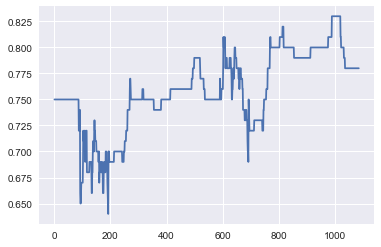

In [31]:
#Q19
print("max accuracy is:")
print(max_acc)
print("best lambda is:")
print(max_reg)
plt.plot(x_plot);
plt.show()

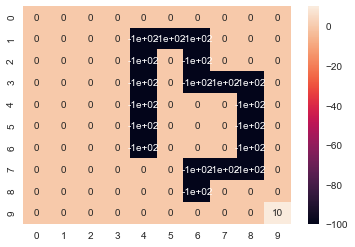

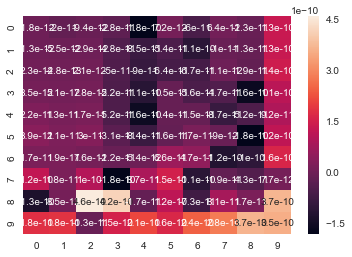

once
0 5 changed 0 to 2
2 9 changed 3 to 1
7 0 changed 1 to 3
9 8 changed 2 to 0
ud 1 5
ud 3 9
lr 8 3
lr 8 4
lr 9 9
once
9 9 changed 3 to 1
0.83


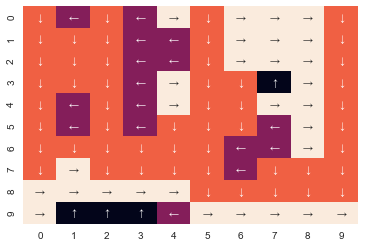

In [29]:
#Q20
plt.clf()
ax = sns.heatmap(reward_2, annot=True)
plt.show()
plt.clf()
ax1 = sns.heatmap(max_reward, annot=True)
plt.show()

policy_computed = value_iteration_action1(max_reward, state_space, action_set, discount_factor)
#print(policy_computed)

policy_computed1 = value_iteration_action1(reward_2, state_space, action_set, discount_factor)
#print(policy_computed)


import sys
arrows = [u'\u2191', u'\u2190',u'\u2193',u'\u2192']
arrow_matrix = np.array(policy_computed, dtype=object)
# print arrows
for i in range(0, 10):
    for j in range(0, 10):
        index = int(policy_computed[i][j])
        arrow_matrix[i][j] = arrows[index]
ax = sns.heatmap(policy_computed, annot=arrow_matrix, fmt='',cbar=False)





count =0;
for i in range(10):
    for j in range(10):
        if(policy_computed[i][j]==actual_policy[i][j]):
            count+=1;
acc=count/100.0;
print(acc)

if(acc>max_acc):
        max_acc=acc
        max_reg=i/100.0
        max_reward=reward_computed
    x_plot.append(acc);
    
print("max accuracy is:")
print(acc)
print("best lambda is:")
print(max_reg)
plt.plot(x_plot);
plt.show()




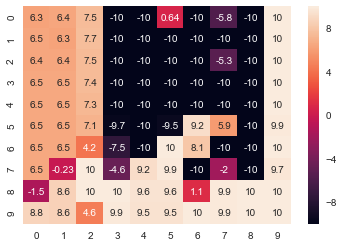

[[  6.30266491   6.43010276   7.54694172  -9.99999999 -10.
    0.63706512 -10.          -5.79904741 -10.          10.        ]
 [  6.47910077   6.30344317   7.65184749 -10.         -10.
  -10.         -10.         -10.         -10.          10.        ]
 [  6.41419029   6.41763455   7.48795345 -10.          -9.99999997
  -10.         -10.          -5.31935991 -10.           9.99812239]
 [  6.48925489   6.48925486   7.43617836  -9.99999999  -9.99999999
   -9.99999997 -10.         -10.         -10.          10.        ]
 [  6.48769103   6.48769104   7.26805941 -10.         -10.
   -9.99999997 -10.         -10.         -10.          10.        ]
 [  6.48769105   6.48769103   7.05186119  -9.65454603  -9.99999995
   -9.49015041   9.23774328   5.90246206 -10.           9.88745348]
 [  6.48769102   6.48769103   4.18130996  -7.45326445  -9.99999999
    9.99999999   8.06218877 -10.          -9.99999956  10.        ]
 [  6.48769106  -0.2294891    9.99999999  -4.62142371   9.24618446
    9.855958

In [15]:
plt.clf()
ax1 = sns.heatmap(max_reward, annot=True)
plt.show()
print (max_reward)

Heat map of Optimal State Values for Reward Function 2


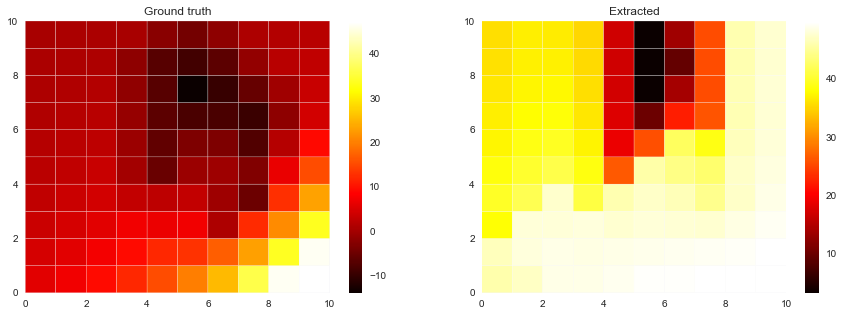

In [16]:
#21
actual_value = value_iteration_value(reward_2, state_space, action_set, discount_factor)
policy_value = value_iteration_value(max_reward, state_space, action_set, discount_factor)

print("Heat map of Optimal State Values for Reward Function 2")
fig = plt.figure(figsize=(15, 5))
axes = fig.subplots(nrows=1, ncols=2)

plt.subplot(1,2,1)
plt.title("Ground truth")
plt.pcolor(np.flipud(actual_value), edgecolors = 'white', cmap = 'hot')
plt.colorbar()

plt.subplot(1,2,2)
plt.title("Extracted")
#optimal_state_values_extracted_r1 = get_optimal_state_value_fn(extracted_reward_fn_1, S, A, gamma, 0.01, state_space, w)
plt.pcolor(np.flipud(policy_value), edgecolors = 'white', cmap = 'hot')
plt.colorbar()
plt.show()

3.0 3.0 2.0 1.0 1.0 1.0 3.0 3.0 3.0 2.0 
3.0 3.0 2.0 1.0 1.0 1.0 3.0 3.0 3.0 2.0 
3.0 3.0 2.0 1.0 1.0 1.0 3.0 3.0 3.0 2.0 
3.0 3.0 2.0 1.0 1.0 2.0 2.0 3.0 3.0 2.0 
3.0 3.0 2.0 1.0 1.0 2.0 2.0 2.0 3.0 2.0 
3.0 3.0 2.0 1.0 3.0 2.0 2.0 1.0 3.0 2.0 
3.0 3.0 2.0 1.0 3.0 2.0 1.0 1.0 3.0 2.0 
0.0 3.0 2.0 2.0 2.0 2.0 1.0 2.0 2.0 2.0 
3.0 3.0 3.0 2.0 1.0 2.0 2.0 2.0 2.0 2.0 
3.0 0.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 


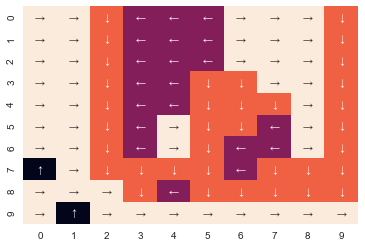

In [17]:
import pandas as pd
from IPython.core.display import HTML

import sys
arrows = [u'\u2191', u'\u2190',u'\u2193',u'\u2192']
arrow_matrix = np.array(policy_computed, dtype=object)
# print arrows
for i in range(0, 10):
    for j in range(0, 10):
        index = int(policy_computed[i][j])
        arrow_matrix[i][j] = arrows[index]


import sys
arrows = [u'\u2191', u'\u2190',u'\u2193',u'\u2192']
arrow_matrix = np.array(policy_computed, dtype=object)
# print arrows
for i in range(0, 10):
    for j in range(0, 10):
        index = int(policy_computed[i][j])
        arrow_matrix[i][j] = arrows[index]
    
ax = sns.heatmap(policy_computed, annot=arrow_matrix, fmt='',cbar=False)
for i in range(0, 10):
    for j in range(0, 10):
        print(policy_computed[i][j],end =" ")
    print()
#multi_table([pd.DataFrame(arrow1_matrix), pd.DataFrame(arrow_matrix)])

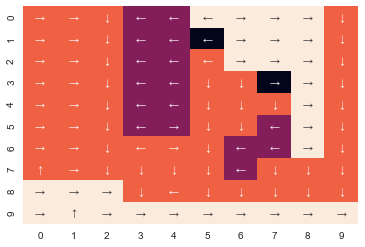

In [18]:
import sys
arrows = [u'\u2191', u'\u2190',u'\u2193',u'\u2192']
arrow_matrix1 = np.array(actual_policy, dtype=object)
# print arrows
for i in range(0, 10):
    for j in range(0, 10):
        index = int(policy_computed[i][j])
        arrow_matrix1[i][j] = arrows[index]
ax = sns.heatmap(actual_policy, annot=arrow_matrix1, fmt='',cbar=False)